#### Short blog post on the age composition of full-time workers in the CPS over time

Brian Dew, @bd_econ

May 10, 2018

-----


TO DO: 

- Generate single line chart - PA share of total since 1994
- Generate horizontal bar chart - change since 2014

In [1]:
import pandas as pd
import numpy as np
import glob, os

%matplotlib inline

In [2]:
path = 'C:/Working/econ_data/micro/data/'

files = glob.glob(os.path.join(path, "*.ft"))

df = pd.concat((pd.read_feather(f, nthreads=3) for f in files))

df = df[(df['PEMLR'].isin([1, 2])) & (df['PRFTLF'] == 1)]

age_cutoffs = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 100]
df['AGE'] = pd.cut(df['PRTAGE'], age_cutoffs)

df['PA'] = np.where(df['PRTAGE'].between(25,54), 1, 0)

grouped = df.groupby(['HRYEAR4', 'HRMONTH'])

In [3]:
data = pd.DataFrame()
for name, group in grouped:
    date = pd.to_datetime(f'{name[0]}-{name[1]}-01')
    data.at[date, 'PA_sh'] = np.average(group.PA, weights=group.PWSSWGT)

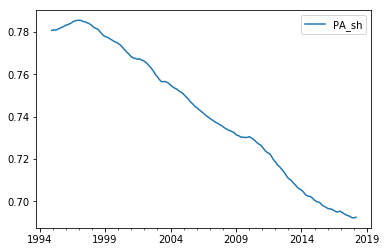

In [4]:
data.rolling(12).mean().plot()

In [13]:
dft14 = df[((df['HRYEAR4'] == 2013) & (df['HRMONTH'] > 3)) | ((df['HRYEAR4'] == 2014) & (df['HRMONTH'] <= 3))]
dft16 = df[((df['HRYEAR4'] == 2015) & (df['HRMONTH'] > 3)) | ((df['HRYEAR4'] == 2016) & (df['HRMONTH'] <= 3))]
dft18 = df[((df['HRYEAR4'] == 2017) & (df['HRMONTH'] > 3)) | (df['HRYEAR4'] == 2018)]

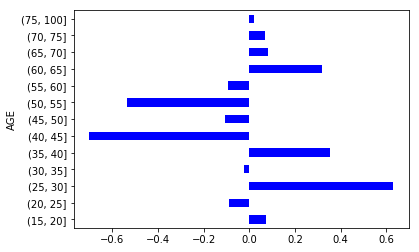

In [14]:
(((dft18.groupby(['AGE'])['PWCMPWGT'].sum() / 
 dft18['PWCMPWGT'].sum()) - 
 (dft16.groupby(['AGE'])['PWCMPWGT'].sum() / 
  dft16['PWCMPWGT'].sum())) * 100).plot(kind='barh', color=['blue'])

In [ ]:
files = glob.glob(os.path.join(path, "*.ft"))

df = pd.concat((pd.read_feather(f, nthreads=3) for f in files))

In [ ]:
df = df[(df['PEMLR'].isin([1, 2])) & (df['PRFTLF'] == 1)]

In [ ]:
age_cutoffs = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 100]
df['AGE'] = pd.cut(df['PRTAGE'], age_cutoffs)

In [ ]:
df['PA'] = np.where(df['PRTAGE'].between(25,54), 1, 0)

In [ ]:
grouped = df.groupby(['HRYEAR4', 'HRMONTH'])

In [ ]:
data = pd.DataFrame()
for name, group in grouped:
    date = f'{name[0]}-{name[1]}-01'
    data.at[date, 'PA_sh'] = (group.PA * group.PWCMPWGT).sum()

In [ ]:
(months['PA'] * months['PWCMPWGT']).sum()

In [ ]:
df = pd.read_feather('data/cps_2017.ft', nthreads=3)
df2 = pd.read_feather('data/cps_2016.ft', nthreads=3)
dft14 = df2[(df2['PEMLR'].isin([1, 2])) & (df2['HRMONTH'] > 3)].append(
    df[(df['PEMLR'].isin([1, 2])) & (df2['HRMONTH'] < 4)])

dft14['AGE'] = pd.cut(dft14['PRTAGE'], [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 100])
dft14['JOB'] = (dft14['PRDTIND1'] * 100) + dft14['PRDTOCC1']

df = pd.read_feather('data/cps_2018.ft', nthreads=3)
df2 = pd.read_feather('data/cps_2017.ft', nthreads=3)
dft18 = df2[(df2['PEMLR'].isin([1, 2])) & (df2['HRMONTH'] > 3)].append(
    df[df['PEMLR'].isin([1, 2])])

dft18['AGE'] = pd.cut(dft18['PRTAGE'], [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 100])
dft18['JOB'] = (dft18['PRDTIND1'] * 100) + dft18['PRDTOCC1']

In [ ]:
(((dft18.groupby(['AGE'])['PWCMPWGT'].sum() / 
 dft18['PWCMPWGT'].sum()) - 
 (dft14.groupby(['AGE'])['PWCMPWGT'].sum() / 
  dft14['PWCMPWGT'].sum())) * 100).plot(kind='barh', color=['blue'])

In [ ]:
df = pd.read_feather('data/cps_2018.ft', nthreads=3)
df2 = pd.read_feather('data/cps_2017.ft', nthreads=3)
dft18 = df2[(df2['PEMLR'].isin([1, 2])) & (df2['HRMONTH'] > 3)].append(
    df[df['PEMLR'].isin([1, 2])])

dft18['AGE'] = pd.cut(dft18['PRTAGE'], [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 100])

In [4]:
df.keys()

Index(['GESTFIPS', 'GTMETSTA', 'HRHHID', 'HRHHID2', 'HRMIS', 'HRMONTH',
       'HRYEAR4', 'PEDWWNTO', 'PEEDUCA', 'PEERNLAB', 'PEHRUSL1', 'PEIO1COW',
       'PEJHRSN', 'PEMLR', 'PENLFACT', 'PENLFRET', 'PESEX', 'PRCHLD',
       'PRCITSHP', 'PRCIVLF', 'PRCOW1', 'PRDISC', 'PRDTHSP', 'PRDTIND1',
       'PRDTOCC1', 'PRDTRACE', 'PREMPNOT', 'PRERNHLY', 'PRERNWA', 'PRFTLF',
       'PRMARSTA', 'PRMJIND1', 'PRMJOCC1', 'PRORIGIN', 'PRSJMJ', 'PRTAGE',
       'PRUNEDUR', 'PRUNTYPE', 'PRWKSTAT', 'PRWNTJOB', 'PUIODP1', 'PUIODP2',
       'PULINENO', 'PWCMPWGT', 'PWORWGT', 'PWSSWGT', 'WBHAO', 'AGE', 'PA'],
      dtype='object')

In [ ]:
df[(df['PUIODP1'] == 1)]['PRCOW1']

In [ ]:
df2 = pd.read_feather('data/cps_2013.ft', nthreads=3)

In [ ]:
dft18 = df2[(df2['PEMLR'].isin([1, 2])) & (df2['HRMONTH'] > 3)].append(df[df['PEMLR'].isin([1, 2])])

In [ ]:
dft14 = df2[(df2['PEMLR'].isin([1, 2])) & (df2['HRMONTH'] > 3)].append(df[(df['PEMLR'].isin([1, 2])) & (df2['HRMONTH'] < 4)])

In [ ]:
%matplotlib inline

In [ ]:
((dft18.groupby(['AGE'])['PWCMPWGT'].sum() / 
 dft18['PWCMPWGT'].sum()) - 
 (dft14.groupby(['AGE'])['PWCMPWGT'].sum() / 
  dft14['PWCMPWGT'].sum())).plot(kind='barh')

In [ ]:
pd.cut(dft['PRTAGE'], [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 100])

In [ ]:
df[df['PEMLR'].isin([1, 2])]

In [ ]:
df['PRMJOCC1']